# IMPORT

In [23]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

from xgboost import XGBRegressor

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor


from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

from sklearn.svm import SVC

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerBase
from matplotlib.text import Text
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('ipl.csv')
df.head()


,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


# EDA

c:\users\anuro\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='venue', ylabel='count'>

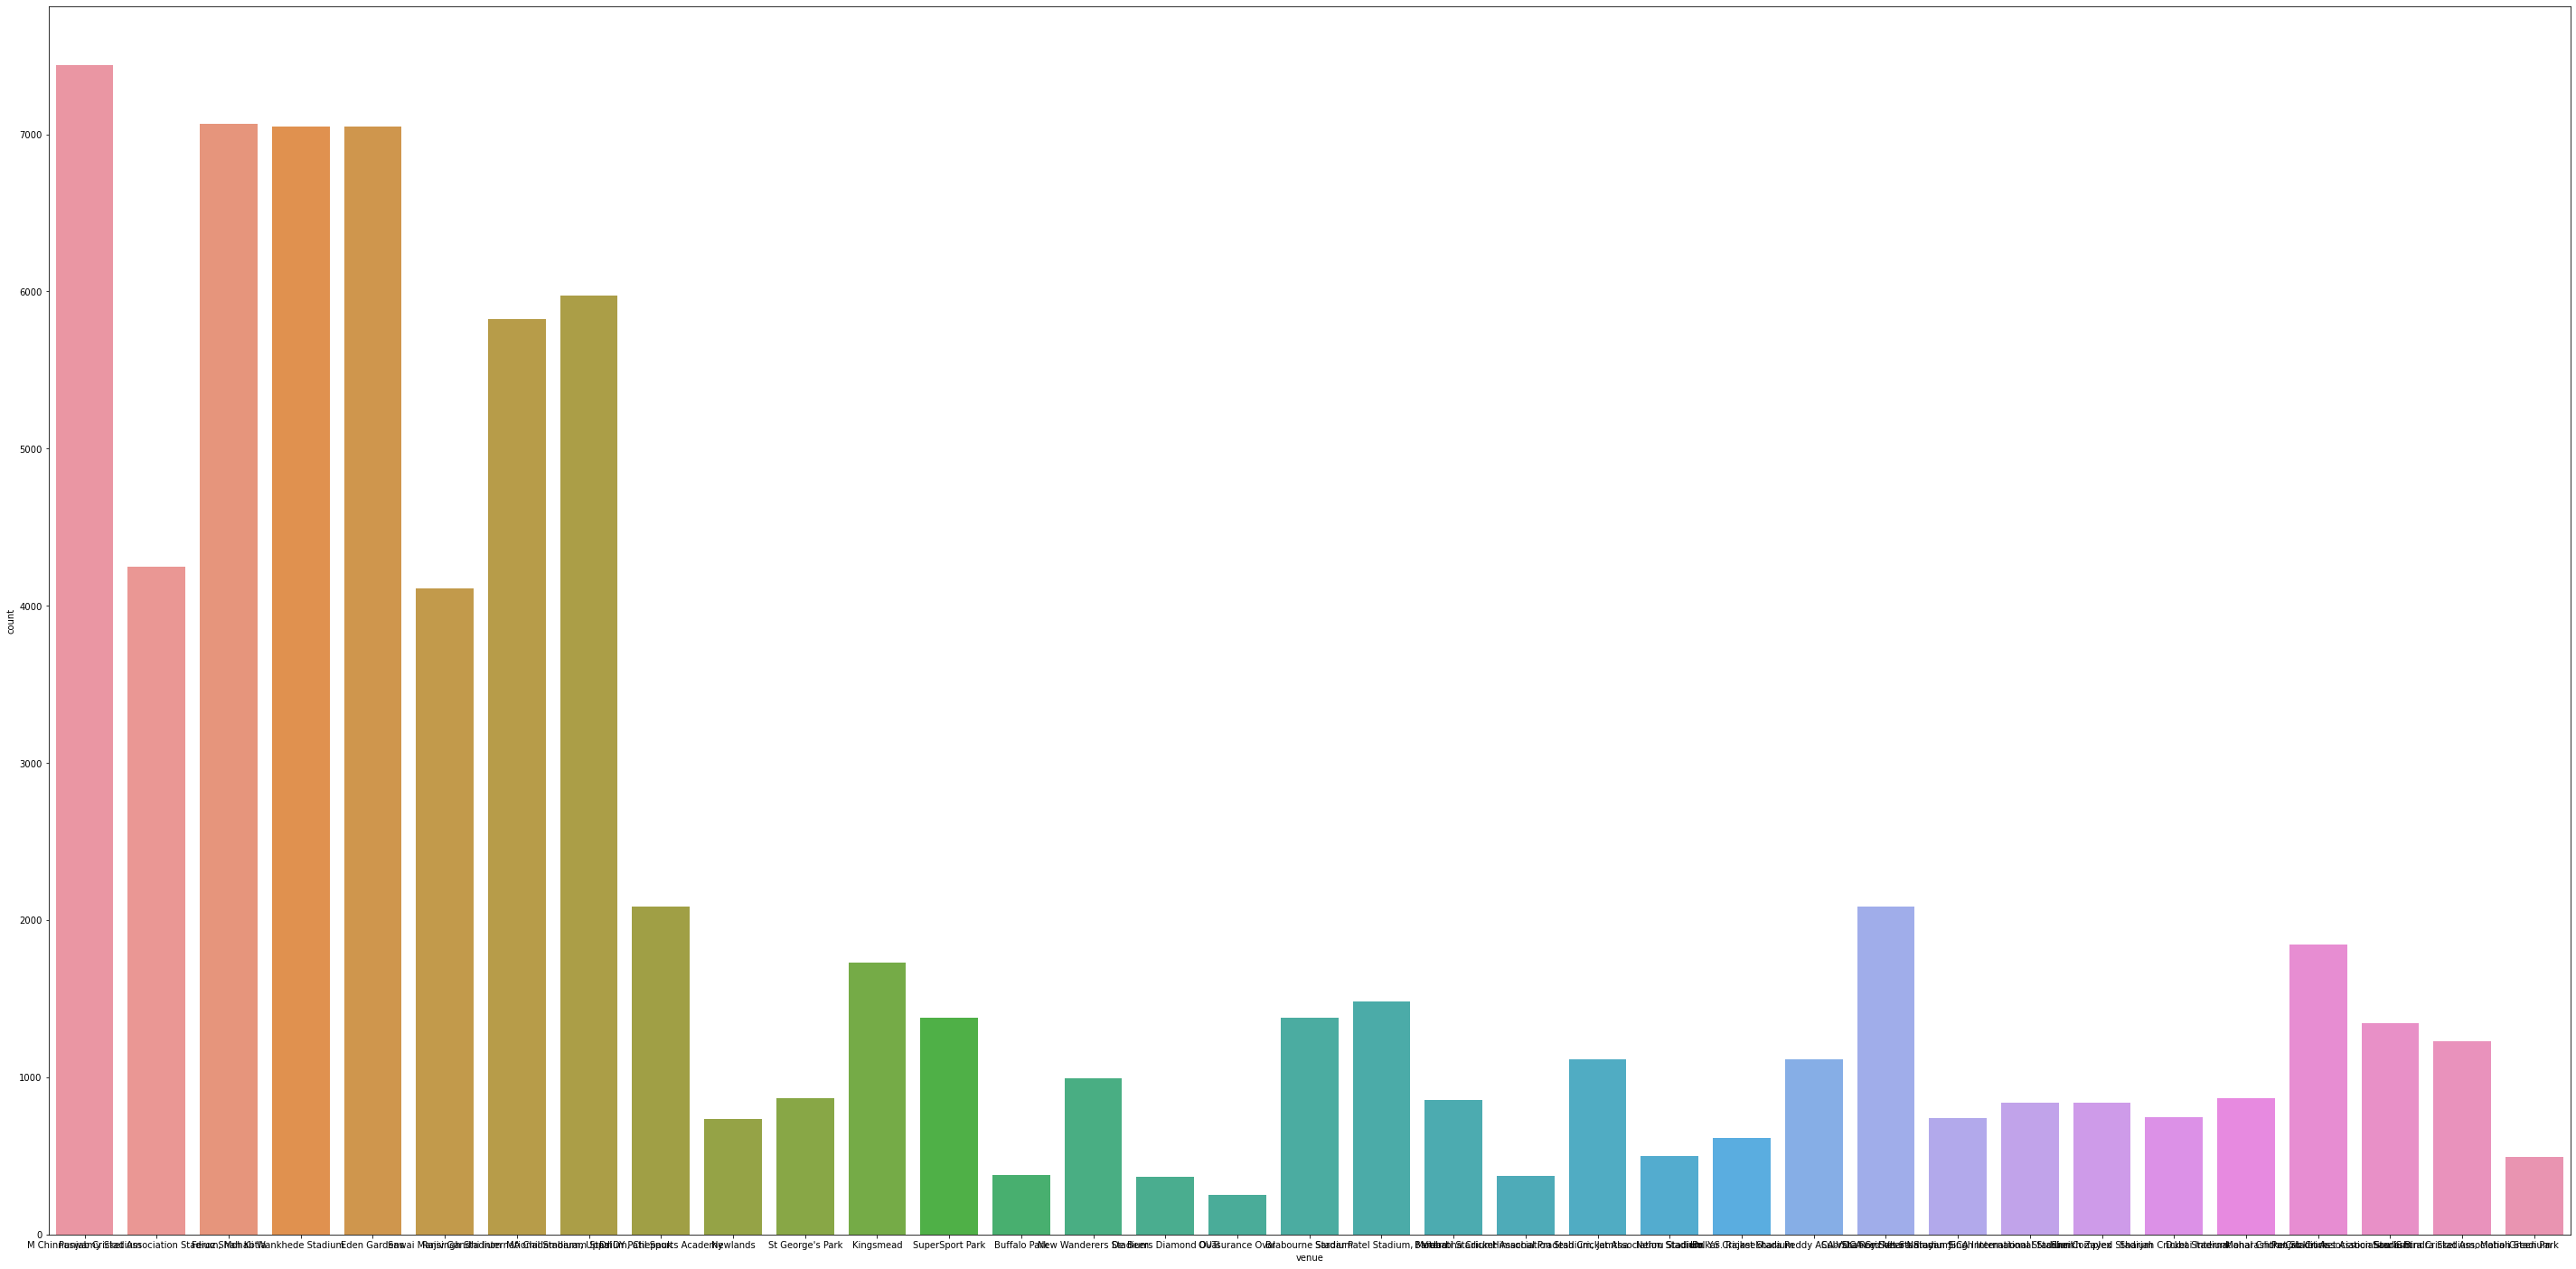

In [3]:
plt.figure(figsize = (50 , 25))
sns.countplot(df['venue'])

In [4]:
df['venue'].value_counts()

M Chinnaswamy Stadium                                   7443
Feroz Shah Kotla                                        7068
Eden Gardens                                            7049
Wankhede Stadium                                        7048
MA Chidambaram Stadium, Chepauk                         5972
Rajiv Gandhi International Stadium, Uppal               5827
Punjab Cricket Association Stadium, Mohali              4247
Sawai Mansingh Stadium                                  4110
Dr DY Patil Sports Academy                              2088
Subrata Roy Sahara Stadium                              2086
Maharashtra Cricket Association Stadium                 1843
Kingsmead                                               1731
Sardar Patel Stadium, Motera                            1484
Brabourne Stadium                                       1380
SuperSport Park                                         1377
Punjab Cricket Association IS Bindra Stadium, Mohali    1342
Saurashtra Cricket Assoc

We can see that most of the matches are played in M Chinnaswamy Stadium 

c:\users\anuro\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[]

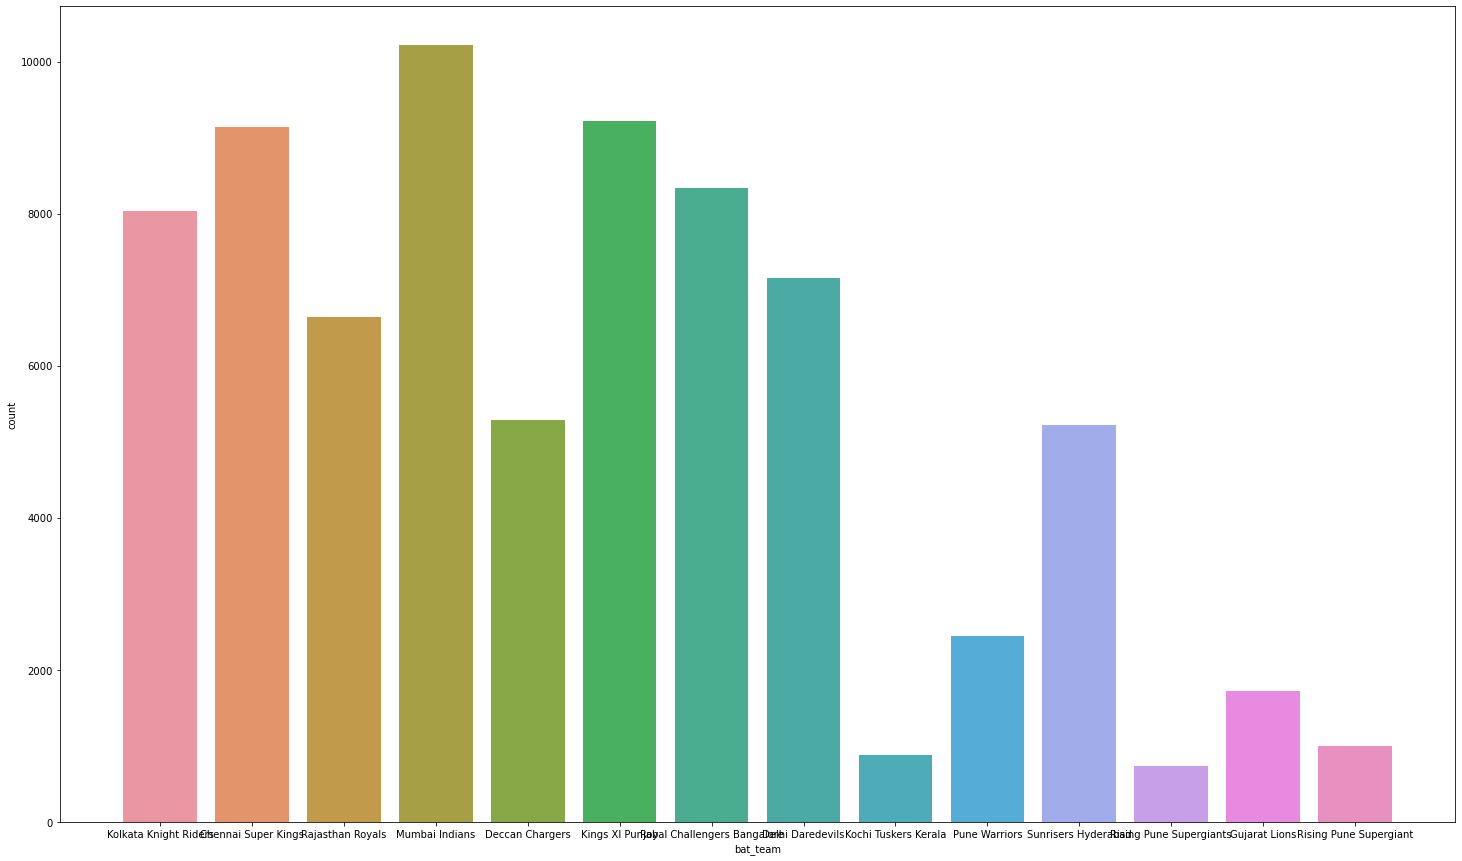

In [5]:
plt.figure(figsize = (25 , 15))
sns.countplot(df['bat_team'])
plt.plot()

In [6]:
df['bat_team'].value_counts()

Mumbai Indians                 10213
Kings XI Punjab                 9219
Chennai Super Kings             9142
Royal Challengers Bangalore     8331
Kolkata Knight Riders           8033
Delhi Daredevils                7152
Rajasthan Royals                6643
Deccan Chargers                 5280
Sunrisers Hyderabad             5216
Pune Warriors                   2448
Gujarat Lions                   1726
Rising Pune Supergiant           994
Kochi Tuskers Kerala             876
Rising Pune Supergiants          741
Name: bat_team, dtype: int64

We can see that the last 5 Teams have played a fewer matchs

(array([  722.,  1710.,  5937., 13820., 19548., 18668., 10468.,  3632.,
         1137.,   372.]),
 array([ 67. ,  86.6, 106.2, 125.8, 145.4, 165. , 184.6, 204.2, 223.8,
        243.4, 263. ]),
 <BarContainer object of 10 artists>)

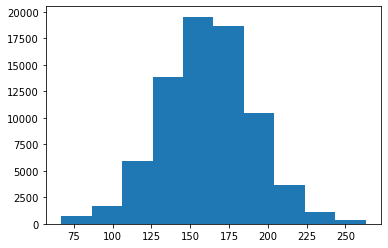

In [7]:
plt.hist(df['total'])

Usually, the score is between 120 - 210

In [8]:
df['total'].mean()

160.9014523640382

Average Score in all this year = 160.9014523640382

In [9]:
consistent_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
                    'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
                    'Delhi Daredevils', 'Sunrisers Hyderabad']

df =  df[(df['bat_team'].isin(consistent_teams)) & (df['bowl_team'].isin(consistent_teams))]


In [10]:
df = df[df['overs']>=7.0]

# Checking Missing Values

<AxesSubplot:>

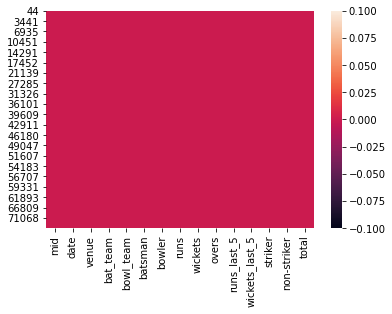

In [11]:
sns.heatmap(df.isnull())

In [12]:
df.isnull().sum().sum()

0

No Missing Values 

# Removing  columns which are not important

In [13]:
df.drop(['mid', 'venue', 'batsman', 'bowler', 'striker', 'non-striker'], axis=1, inplace=True)

In [14]:
from datetime import datetime
df['date'] = df['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

In [15]:
df_encode = pd.get_dummies(data=df)


In [16]:
X_train = df_encode[df_encode['date'].dt.year <= 2016]
y_train = X_train['total']
X_train = X_train.drop(['total'],1)


X_test = df_encode[df_encode['date'].dt.year >= 2017]
y_test = X_test['total']
X_test = X_test.drop(['total'],1)



In [17]:
# Removing the 'date' column
X_train.drop(['date'], 1, inplace=True)
X_test.drop(['date'], 1, inplace=True)

# CV

In [18]:
models = [KNeighborsRegressor(),AdaBoostRegressor(),LinearRegression(),RandomForestRegressor(),DecisionTreeRegressor()]
for i in models:
    print(i," = ",np.mean(cross_val_score(estimator = i, X = X_train, y = y_train, cv = 5)))
    

KNeighborsRegressor()  =  0.5605967490094927
AdaBoostRegressor()  =  0.5061256952595276
LinearRegression()  =  0.6716872800559427
RandomForestRegressor()  =  0.5965391810311624
DecisionTreeRegressor()  =  0.3718862957189452


# Fit and Score

In [19]:
models = [KNeighborsRegressor(),AdaBoostRegressor(),LinearRegression(),RandomForestRegressor(),DecisionTreeRegressor()]
for i in models:
    print(i.fit(X_train,y_train))
    print(i.score(X_train,y_train))
    print(i.score(X_test,y_test))
    print('\n')


KNeighborsRegressor()
0.9031483325556244
0.6648224643388561


AdaBoostRegressor()
0.5689164056258895
0.5642156827280598


LinearRegression()
0.7021603771133487
0.7885214767384442


RandomForestRegressor()
0.9945709494722383
0.7163537865652381


DecisionTreeRegressor()
0.9999235220925975
0.5311664913159073




# Scaling 

In [20]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [21]:
models = [KNeighborsRegressor(),AdaBoostRegressor(),LinearRegression(),RandomForestRegressor(),DecisionTreeRegressor()]
for i in models:
    print(i," = ",np.mean(cross_val_score(i, X_train_scaled, y_train, cv = 5)))
    

KNeighborsRegressor()  =  0.014414481384622691
AdaBoostRegressor()  =  0.5095185999629945
LinearRegression()  =  0.6714751949184288
RandomForestRegressor()  =  0.597378222877098
DecisionTreeRegressor()  =  0.3752627277026822


In [24]:
models = [KNeighborsRegressor(),AdaBoostRegressor(),LinearRegression(),RandomForestRegressor(),DecisionTreeRegressor(),XGBRegressor()]
for i in models:
    print(i.fit(X_train_scaled,y_train))
    print(i.score(X_train_scaled,y_train))
    print(i.score(X_test_scaled,y_test))
    print('\n')


KNeighborsRegressor()
0.9822542043181078
0.18243781158091998


AdaBoostRegressor()
0.5677683893518579
0.5836759949803583


LinearRegression()
0.7020795026061342
0.7883858445936487


RandomForestRegressor()
0.9946569468522728
0.722597101510025


DecisionTreeRegressor()
0.9999235220925975
0.5488970973180387


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)
0.9169035107440818
0.7132234765753294




c:\users\anuro\appdata\local\programs\python\python37\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
c:\users\anuro\appdata\local\programs\python\python37\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


In [26]:
lr = LinearRegression()
print(lr.fit(X_train_scaled,y_train))
print(lr.score(X_train_scaled,y_train))
print(lr.score(X_test_scaled,y_test))

LinearRegression()
0.7020795026061342
0.7883858445936487


In [27]:
np.mean(cross_val_score(lr, X_train_scaled, y_train, cv = 5))

0.6714751949184288

In [28]:
prediction=lr.predict(X_test_scaled)

c:\users\anuro\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total', ylabel='Density'>

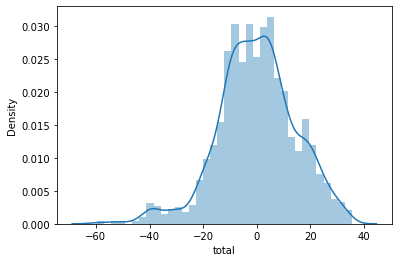

In [29]:
sns.distplot(y_test-prediction)

In [45]:
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))


MAE: 13.274435149474794
MSE: 287.3454428641192
RMSE: 16.951266703822437


In [31]:
from sklearn.linear_model import Ridge
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_train,y_train)

c:\users\anuro\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.98637e-18): result may not be accurate.
  overwrite_a=True).T
c:\users\anuro\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.03055e-18): result may not be accurate.
  overwrite_a=True).T
c:\users\anuro\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.00493e-18): result may not be accurate.
  overwrite_a=True).T
c:\users\anuro\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.04893e-18): result may not be accurate.
  overwrite_a=True).T
c:\users\anuro\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-condi

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             scoring='neg_mean_squared_error')

In [32]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)
ridge_regressor.score(X_train,y_train)

{'alpha': 40}
-276.42380965354994


-259.6067741248181

In [33]:
model_params = {
    
    'linear': {
        'model': LinearRegression(),
        'params': {
             'fit_intercept':[True]
        }
    },
    
    'ridge' : {
        'model' : Ridge(),
        'params' : {
            'solver' :['auto', 'svd', 'cholesky', 'lsqr','sag']
        }
    },
    
    'lasso' : {
        'model' : Lasso(),
        'params' : {
            'alpha' :[0.001,0.01,0.1,0.3,0.5,0.7,0.9,1],
            'selection' : ['cyclic','random']
        }
    }
}

In [34]:
scores=[]

import time
start_time = time.time()

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=5,scoring='neg_mean_squared_error')
    clf.fit(X_train_scaled,y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
print("--- %s seconds ---" % (time.time() - start_time))

c:\users\anuro\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25339.031977199018, tolerance: 2326.2560670153016
  positive)
c:\users\anuro\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6938.635877705179, tolerance: 2270.8597766259945
  positive)
c:\users\anuro\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 801800.2587264036, tolerance: 2168.917286728132
  positive)
c:\users\anuro\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent

--- 83.32682847976685 seconds ---


In [35]:
import pandas as pd

df = pd.DataFrame(scores, columns=['model','best_score','best_params'])
df.sort_values('best_score', ascending=False)

,model,best_score,best_params
2,lasso,-275.530275,"{'alpha': 0.3, 'selection': 'cyclic'}"
1,ridge,-276.699619,{'solver': 'lsqr'}
0,linear,-276.899057,{'fit_intercept': True}


In [36]:
xgbregressor = XGBRegressor()
print(xgbregressor.fit(X_train_scaled,y_train))
print(xgbregressor.score(X_train_scaled,y_train))
print(xgbregressor.score(X_test_scaled,y_test))

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)
0.9169035107440818
0.7132234765753294


c:\users\anuro\appdata\local\programs\python\python37\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
c:\users\anuro\appdata\local\programs\python\python37\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


c:\users\anuro\appdata\local\programs\python\python37\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
c:\users\anuro\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total', ylabel='Density'>

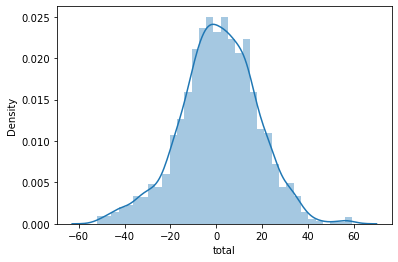

In [37]:
xgbregressor_predict = xgbregressor.predict(X_test_scaled)
sns.distplot(y_test-xgbregressor_predict)

# Making Final Model with XGBRegressor

In [41]:
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(StandardScaler(),XGBRegressor())
pipe.fit(X_train,y_train)
print("Train Accuracy = ",pipe.score(X_train,y_train))
print("Test Accuracy  = ",pipe.score(X_test,y_test))

Train Accuracy =  0.9169035107440818
Test Accuracy  =  0.7132234765753294


c:\users\anuro\appdata\local\programs\python\python37\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
c:\users\anuro\appdata\local\programs\python\python37\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


In [42]:
prediction = pipe.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))


MAE: 13.274435149474794
MSE: 287.3454428641192
RMSE: 16.951266703822437


c:\users\anuro\appdata\local\programs\python\python37\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


In [44]:
filename = 'first-innings-score-lr-model.pkl'
pickle.dump(pipe, open(filename, 'wb'))